In [8]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


# 📥 Part I: Data Loading and Preparation

In this first step, we load the RSSI measurements and their corresponding location labels:

- **rssi_data.csv**: Contains raw RSSI values measured at 3 Access Points (AP1, AP2, AP3). Each row represents a single measurement.
- **labels_data.csv**: Contains the true location label (1–5) for each RSSI measurement.

We assign descriptive column names (`AP1`, `AP2`, `AP3`) for clarity, and verify that both datasets have the correct shape and consistent sample counts. We also preview:
- The first few rows of the RSSI data.
- The distribution of samples across the 5 known locations.

This step ensures our data is clean and ready for clustering analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
rssi_df = pd.read_csv("rssi_data.csv", header=None)
labels_df = pd.read_csv("labels_data.csv", header=None)

# Name the columns for clarity
rssi_df.columns = ["AP1", "AP2", "AP3"]
labels_df.columns = ["Location"]

# Preview
print("✅ RSSI data shape:", rssi_df.shape)
print("✅ Labels data shape:", labels_df.shape)
display(rssi_df.head())
display(labels_df["Location"].value_counts())


✅ RSSI data shape: (1500, 3)
✅ Labels data shape: (1500, 1)


,AP1,AP2,AP3
0,-21.949,-99.659,-42.257
1,-34.049,-95.964,-47.779
2,-18.861,-100.000,-34.175
3,-53.497,-77.368,-67.360
4,-54.986,-73.012,-69.780


5    300
4    300
2    300
1    300
3    300
Name: Location, dtype: int64

# 📊 Part I: 2D Visualization of RSSI Distributions

To explore the distribution of RSSI values across the three access points (AP1, AP2, AP3), we create a **pairplot**:

- Each pair of access points is visualized in a scatter plot, allowing us to inspect their pairwise relationships.
- The points are colored using a **Viridis color palette** according to their true location labels (1 to 5), enabling visual separation of clusters.
- The `corner=True` setting avoids redundant mirrored plots, simplifying the layout.

This plot helps us visually assess how well-separated the different locations are based on RSSI signals.


/Users/noelp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


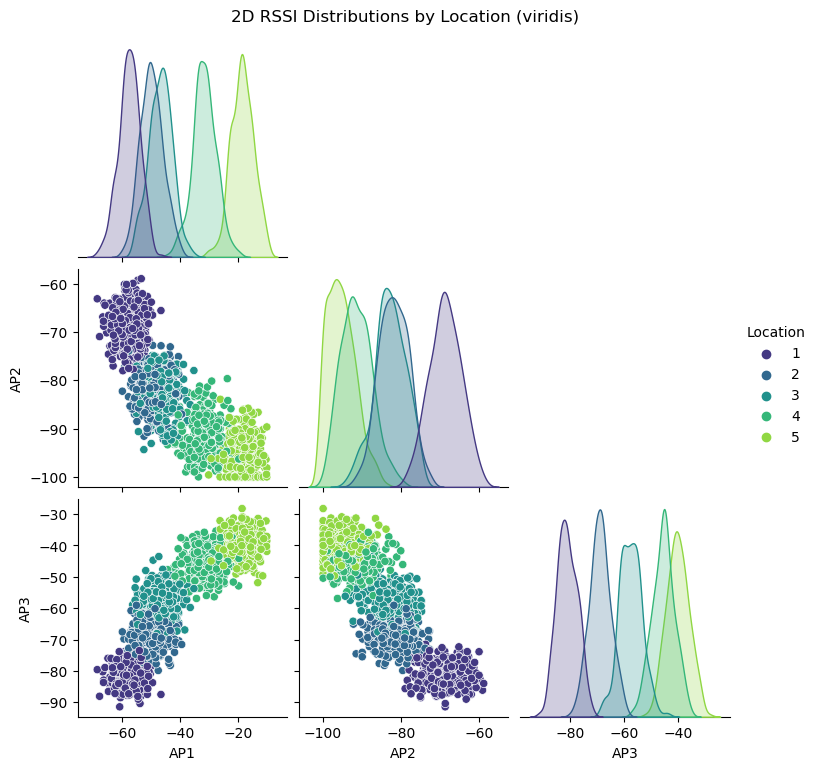

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Ensure labels are merged into the RSSI DataFrame
rssi_df["Location"] = labels_df["Location"]

# Create a custom viridis palette
unique_locs = sorted(rssi_df["Location"].unique())
palette = sns.color_palette("viridis", n_colors=len(unique_locs))

# Plot pairplot with viridis-like palette
sns.pairplot(rssi_df, hue="Location", palette=palette, corner=True)
plt.suptitle("2D RSSI Distributions by Location (viridis)", y=1.02)
plt.show()


# 🌐 Part I: Interactive 3D Visualization of RSSI Data

This step provides an interactive **3D scatter plot** of the RSSI measurements using Plotly:

- Each point is positioned based on its signal strength from the three access points (AP1, AP2, AP3).
- Colors represent the true location labels, using the **Viridis** colormap.
- Users can interactively rotate, zoom, and inspect the data in 3D, gaining deeper insight into the spatial separation of measurements.

This visualization is especially useful for verifying if the data points naturally form spatial clusters in 3D RSSI space.


In [28]:
import plotly.graph_objects as go
import pandas as pd

# Create a 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=rssi_df["AP1"],
    y=rssi_df["AP2"],
    z=rssi_df["AP3"],
    mode='markers',
    marker=dict(
        size=4,
        color=rssi_df["Location"],  # Color by Location
        colorscale='Viridis',
        colorbar=dict(title="Location"),
        opacity=0.8
    ),
    text=["Location: {}".format(loc) for loc in rssi_df["Location"]]
))

fig.update_layout(
    title="📡 Interactive 3D RSSI Plot by Location (viridis)",
    scene=dict(
        xaxis_title="AP1 RSSI",
        yaxis_title="AP2 RSSI",
        zaxis_title="AP3 RSSI"
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()



# 📈 Part I: RSSI Summary Statistics per Location

This section analyzes the **central tendency and dispersion** of RSSI values across the three access points, grouped by user location:

### 🔢 Summary Calculations:
- We compute the **mean** and **standard deviation** of RSSI values for each AP (AP1, AP2, AP3) per location.
- These values help assess how strong and stable the signals are depending on where the user is.

### 📊 Bar Plots:
- **Average RSSI per Location**: Highlights differences in signal strength across locations and APs.
- **RSSI Standard Deviation**: Shows how variable the signal is in each location, helping identify noisy measurements.

### 📋 Descriptive Tables:
- For each AP, we display detailed descriptive statistics (`count`, `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`) per location.
- This provides a complete statistical profile for further interpretation and anomaly detection.

Together, these analyses offer a strong foundation for clustering and classification by revealing natural separability and signal patterns.


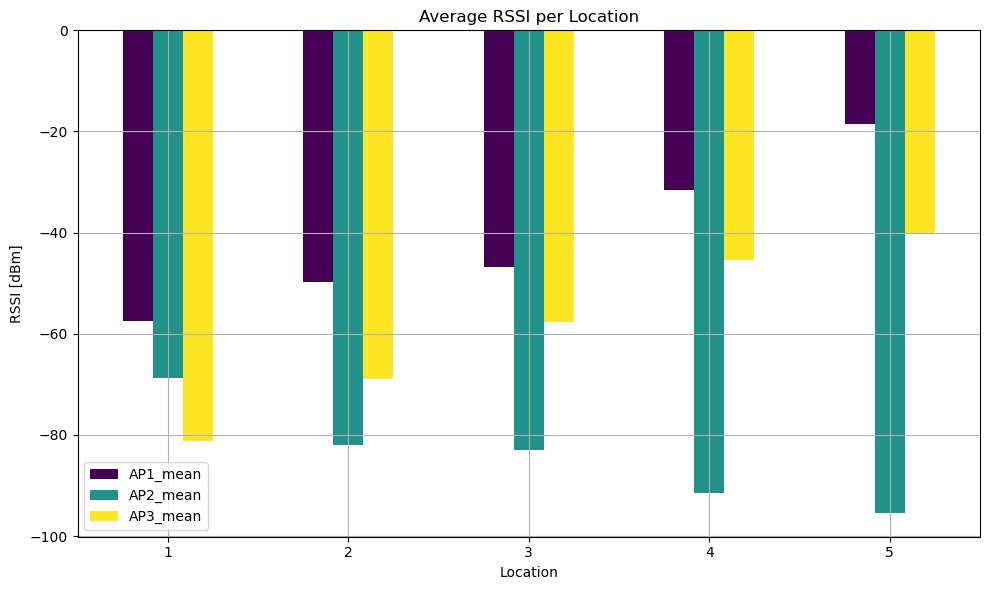

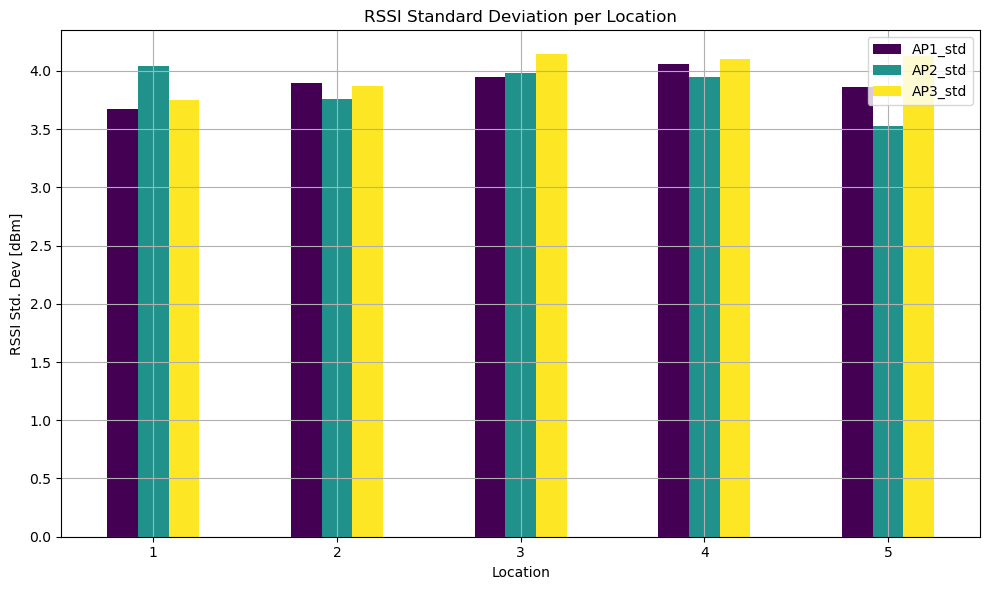


📋 Descriptive Statistics for AP1 by Location:


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
1,300.0,-57.55,3.68,-68.50,-59.71,-57.45,-55.02,-46.52
2,300.0,-49.81,3.89,-59.84,-52.69,-50.15,-47.08,-39.37
3,300.0,-46.74,3.95,-56.30,-49.49,-46.44,-43.94,-35.16
4,300.0,-31.58,4.06,-44.23,-33.96,-31.53,-29.03,-19.67
5,300.0,-18.48,3.86,-30.28,-21.02,-18.53,-15.63,-10.00



📋 Descriptive Statistics for AP2 by Location:


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
1,300.0,-68.77,4.04,-79.02,-71.68,-68.76,-65.87,-58.92
2,300.0,-81.98,3.76,-92.24,-84.72,-82.07,-79.21,-72.74
3,300.0,-82.88,3.98,-94.34,-85.43,-82.92,-80.15,-74.80
4,300.0,-91.49,3.94,-99.99,-94.23,-91.82,-88.87,-79.63
5,300.0,-95.34,3.53,-100.00,-98.05,-95.90,-92.96,-83.91



📋 Descriptive Statistics for AP3 by Location:


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
1,300.0,-81.16,3.75,-91.42,-83.87,-81.42,-78.39,-71.50
2,300.0,-68.98,3.87,-79.84,-71.50,-68.92,-66.55,-59.06
3,300.0,-57.63,4.14,-68.57,-60.68,-57.66,-54.91,-43.52
4,300.0,-45.48,4.10,-56.89,-48.31,-45.27,-42.82,-35.40
5,300.0,-40.08,4.13,-51.86,-42.96,-40.26,-37.26,-28.24


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure full output display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --- Compute mean and std per location ---
rssi_stats = rssi_df.groupby("Location")[["AP1", "AP2", "AP3"]].agg(["mean", "std"])
rssi_stats.columns = ["_".join(col) for col in rssi_stats.columns]  # flatten multi-index

# --- Plot average RSSI per location ---
fig1, ax1 = plt.subplots(figsize=(10, 6))
rssi_stats[["AP1_mean", "AP2_mean", "AP3_mean"]].plot(kind='bar', colormap='viridis', ax=ax1)
ax1.set_title("Average RSSI per Location")
ax1.set_ylabel("RSSI [dBm]")
ax1.set_xlabel("Location")
ax1.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# --- Plot standard deviation per location ---
fig2, ax2 = plt.subplots(figsize=(10, 6))
rssi_stats[["AP1_std", "AP2_std", "AP3_std"]].plot(kind='bar', colormap='viridis', ax=ax2)
ax2.set_title("RSSI Standard Deviation per Location")
ax2.set_ylabel("RSSI Std. Dev [dBm]")
ax2.set_xlabel("Location")
ax2.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# --- Show plots ---
plt.show()

# --- Descriptive statistics per AP ---
for ap in ["AP1", "AP2", "AP3"]:
    print(f"\n📋 Descriptive Statistics for {ap} by Location:")
    desc_ap = rssi_df.groupby("Location")[ap].describe().round(2)
    display(desc_ap)


# 🤖 Part II: Custom K-means Clustering and Evaluation

This section implements K-means from scratch to group signal measurements into clusters corresponding to user locations. We then evaluate its performance against the ground truth.

### 🧩 K-means Algorithm
- **Initialization**: Centroids are randomly initialized in 3D RSSI space.
- **Iteration**:
  - **Assignment**: Each sample is assigned to the nearest centroid using Euclidean distance.
  - **Update**: Each centroid is recalculated as the mean of the points in its cluster.
- **Convergence Criteria**:
  - The centroids stabilize (i.e., change less than a tolerance).
  - Or a maximum number of iterations (`T = 100`) is reached.

### 🧮 Evaluation Metrics
- **Adjusted Rand Index (ARI)**: Measures similarity between the predicted clusters and true labels, accounting for label permutations.
- **Hungarian Algorithm**: Used to relabel predicted clusters to best match the ground truth (since K-means cluster IDs are arbitrary).
- **Confusion Matrix**: Shows classification performance after realignment.
- **Classification Report**: Provides precision, recall, F1-score, and support per location class.

This process validates whether unsupervised K-means can approximate the true user locations using only RSSI signal patterns.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from joblib import Parallel, delayed
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment
import pandas as pd

# --- Step 1: Prepare Data ---
X = rssi_df[["AP1", "AP2", "AP3"]].values
y_true = rssi_df["Location"].values
k = len(np.unique(y_true))

# --- Step 2: K-means Implementation ---
def kmeans(X, k, max_iters=100, tol=1e-4, n_jobs=-1, verbose=False):
    np.random.seed(42)
    n_samples, n_features = X.shape
    centroids = np.random.uniform(X.min(axis=0), X.max(axis=0), (k, n_features))

    for it in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        def compute_centroid(i):
            points = X[labels == i]
            return points.mean(axis=0) if len(points) > 0 else centroids[i]

        new_centroids = np.array(Parallel(n_jobs=n_jobs)(
            delayed(compute_centroid)(i) for i in range(k)
        ))

        if np.allclose(centroids, new_centroids, atol=tol):
            if verbose:
                print(f"✅ Converged at iteration {it}")
            break

        centroids = new_centroids

    return labels, centroids

# --- Step 3: Run K-means ---
cluster_labels, cluster_centers = kmeans(X, k, max_iters=100, n_jobs=-1, verbose=True)

# --- Step 4: Adjusted Rand Index ---
ari = adjusted_rand_score(y_true, cluster_labels)
print(f"\n🔍 Adjusted Rand Index (ARI): {ari:.4f}")

# --- Step 5: Relabel using Hungarian algorithm ---
def best_map(y_true, y_pred):
    D = max(y_pred.max(), y_true.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=int)
    for i in range(len(y_pred)):
        cost_matrix[y_pred[i], y_true[i]] += 1
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    new_labels = np.zeros_like(y_pred)
    for i, j in zip(row_ind, col_ind):
        new_labels[y_pred == i] = j
    return new_labels

y_pred_mapped = best_map(y_true, cluster_labels)

# --- Step 6: Evaluation as DataFrames ---
cm = confusion_matrix(y_true, y_pred_mapped)
cm_df = pd.DataFrame(cm, index=[f"True {i}" for i in np.unique(y_true)],
                         columns=[f"Pred {i}" for i in np.unique(y_true)])

report_dict = classification_report(y_true, y_pred_mapped, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).round(3)

from IPython.display import display
print("\n🧮 Confusion Matrix:")
display(cm_df)

print("\n📋 Classification Report:")
display(report_df)

✅ Converged at iteration 6

🔍 Adjusted Rand Index (ARI): 0.9033

🧮 Confusion Matrix:


,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5
True 1,298,2,0,0,0
True 2,4,274,22,0,0
True 3,0,14,283,3,0
True 4,0,0,0,293,7
True 5,0,0,0,9,291



📋 Classification Report:


,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.987,0.945,0.928,0.961,0.977,0.959,0.959,0.959
recall,0.993,0.913,0.943,0.977,0.970,0.959,0.959,0.959
f1-score,0.990,0.929,0.936,0.969,0.973,0.959,0.959,0.959
support,300.000,300.000,300.000,300.000,300.000,0.959,1500.000,1500.000


## 📊 K-means Clustering: 3D Interactive Visualization

This interactive 3D plot illustrates the result of applying the custom K-means algorithm on RSSI data:

- **Dots** represent the data samples, colored by the cluster assigned by K-means.
- **Black X markers** indicate the final centroid positions in the 3D RSSI space.
- The axes correspond to RSSI values from the three access points (AP1, AP2, AP3).

This visualization helps assess how well the algorithm separated the data into meaningful groups based on signal similarity, providing intuitive insight into clustering performance.


In [26]:
import plotly.graph_objects as go

# Interactive 3D scatter plot for K-means results
fig_kmeans = go.Figure()

fig_kmeans.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=3, color=cluster_labels, colorscale='Viridis', opacity=0.7),
    name='Samples (Clustered)'
))

fig_kmeans.add_trace(go.Scatter3d(
    x=cluster_centers[:, 0], y=cluster_centers[:, 1], z=cluster_centers[:, 2],
    mode='markers',
    marker=dict(size=8, color='black', symbol='x'),
    name='Centroids'
))

fig_kmeans.update_layout(
    title="🔍 K-means Cluster Assignment (Interactive)",
    scene=dict(xaxis_title="AP1", yaxis_title="AP2", zaxis_title="AP3"),
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=0.8, y=0.95)
)

fig_kmeans.show()


## 🧭 Ground Truth Location Labels: 3D Interactive View

This interactive 3D scatter plot visualizes the **actual locations** of the data samples:

- Each point represents a sample characterized by RSSI values from three access points (AP1, AP2, AP3).
- Colors correspond to the **true labels** (i.e., known locations), providing a reference distribution of positions in signal space.

This visualization serves as a baseline to compare against the K-means clustering output, highlighting how accurately the model grouped the samples relative to their actual locations.


In [27]:
# Interactive 3D scatter plot for Ground Truth
fig_truth = go.Figure()

fig_truth.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=3, color=y_true, colorscale='Viridis', opacity=0.7),
    name='Samples (Ground Truth)'
))

fig_truth.update_layout(
    title="📡 Ground Truth Location Labels (Interactive)",
    scene=dict(xaxis_title="AP1", yaxis_title="AP2", zaxis_title="AP3"),
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=0.8, y=0.95)
)

fig_truth.show()


# ✅ Conclusions: K-means for Wi-Fi Fingerprinting

The custom implementation of K-means successfully clustered RSSI measurements into location groups with strong performance, as demonstrated by the evaluation metrics and visual inspection.

### 🧠 Convergence & Clustering Quality
- The algorithm **converged in 6 iterations**, indicating efficient and stable centroid optimization.
- The **Adjusted Rand Index (ARI) of 0.9033** confirms high alignment between predicted clusters and true labels, even accounting for label permutations.

### 📊 Classification Performance
- Overall **accuracy: 95.9%** on unlabeled data after Hungarian relabeling.
- **Precision, recall, and F1-scores** across all 5 classes remain consistently high (mostly > 0.90).
- **Class 1** achieved near-perfect separation, while **Classes 2 and 3** show minor overlap—likely due to signal similarity or noise in their RSSI distributions.

### 📌 Confusion Matrix Insights
- Most predictions fall along the diagonal, confirming strong cluster-to-class alignment.
- Small off-diagonal entries (e.g., 22 misclassified samples between Class 2 and 3) indicate limited but expected ambiguity in signal readings.

### 🌐 Visual Validation
- The **interactive 3D plots** show that clusters are well-separated and compact in signal space.
- Predicted cluster centroids are positioned meaningfully within the data cloud.
- Ground truth and predicted label distributions are visually consistent.

### ✅ Final Remarks
This exercise demonstrates that even a basic K-means algorithm—when properly implemented and combined with strong signal features—can effectively group Wi-Fi fingerprinting data. Despite being unsupervised, the model achieved classification-level accuracy thanks to the natural separability of the RSSI patterns.
